In [48]:
# 데이터 분석 라이브러리
import pandas as pd     # 데이터프레임 생성과 조작을 위한 라이브러리
import numpy as np      # 수치 연산을 위한 라이브러리

# 시각화 라이브러리
import matplotlib.pyplot as plt     # 기본적인 플로팅 기능 제공
import seaborn as sns               # 데이터 시각화에 유용한 고수준 인터페이스 제공
import plotly.express as px         # 대화형 플롯 생성을 위한 라이브러리
import plotly.graph_objects as go   # Plotly의 그래프 객체 사용

In [49]:
df = pd.read_csv('C:\\Users\\gadi2\\OneDrive\\바탕 화면\\study file\\Churn_Modelling.csv')

In [50]:
# 열 이름을 리스트에 넣습니다.
names = list(df.columns)

# 데이터프레임의 열 이름을 설정합니다.
df.columns = names

# 설정된 열 이름을 출력합니다.
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [51]:
print(df.head())
df.describe()

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [52]:
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [88]:
df.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
Age_Group          False
dtype: bool

In [53]:
# 'RowNumber', 'CustomerId', 'Surname' 열 삭제:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [54]:
# X와 y 값 설정
X = df.drop('Exited', axis=1)  # 특성 데이터
y = df['Exited']  # 타겟 데이터

In [55]:
# 'Exited' 열의 데이터 타입을 문자열로 변환
df['Exited'] = df['Exited'].astype(bool)

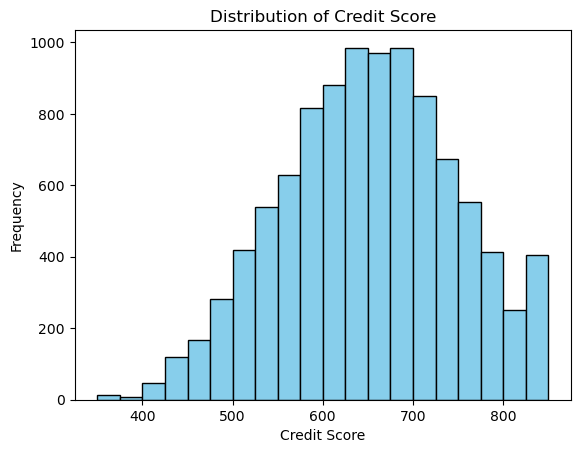

In [56]:
# 'CreditScore': 히스토그램
import matplotlib.pyplot as plt

plt.hist(df['CreditScore'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Score')
plt.show()

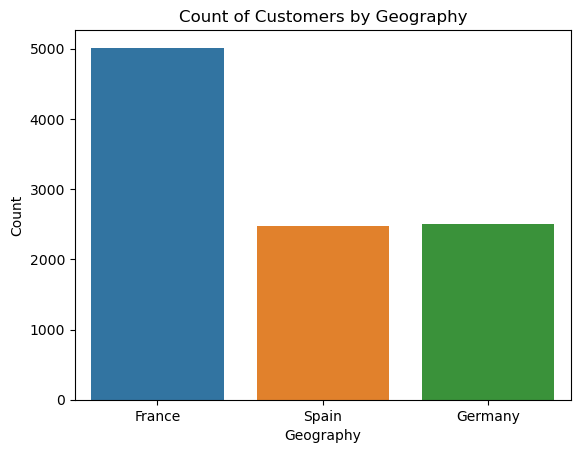

In [57]:
# 'Geography': 카테고리별 막대 그래프
import seaborn as sns

sns.countplot(x='Geography', data=df)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Count of Customers by Geography')
plt.show()

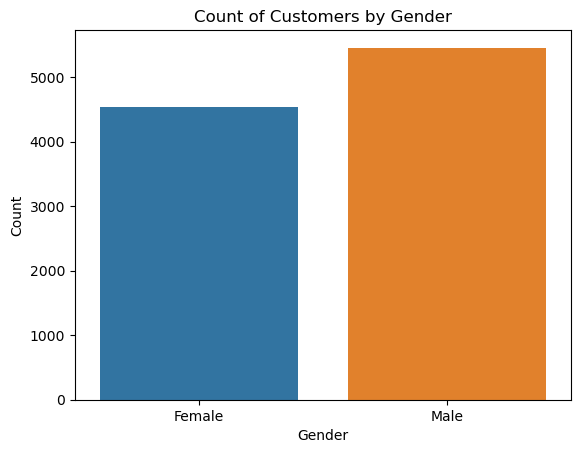

In [58]:
# 'Gender': 카테고리별 막대 그래프
sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Customers by Gender')
plt.show()

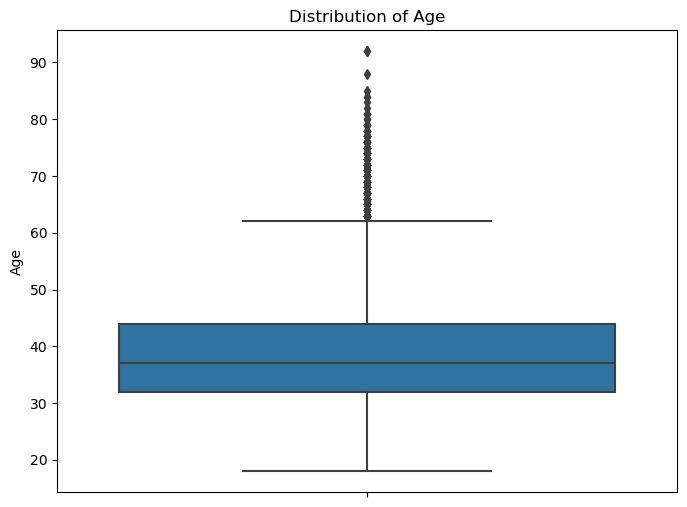

In [59]:
# 'Age': 박스 플롯
plt.figure(figsize=(8, 6))
sns.boxplot(y='Age', data=df)
plt.ylabel('Age')
plt.title('Distribution of Age')
plt.show()

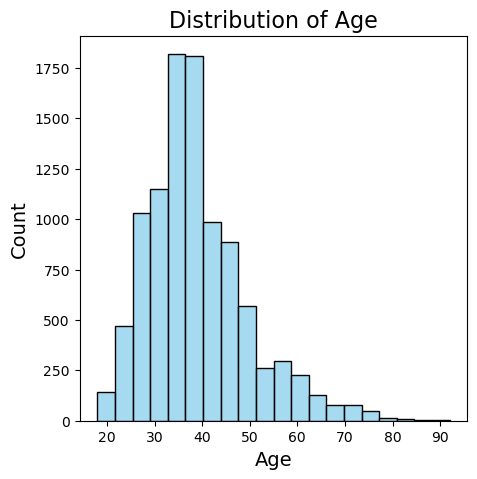

In [106]:
# 'Age'에 대한 히스토그램
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='Age', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Age', fontsize=16)
plt.show()

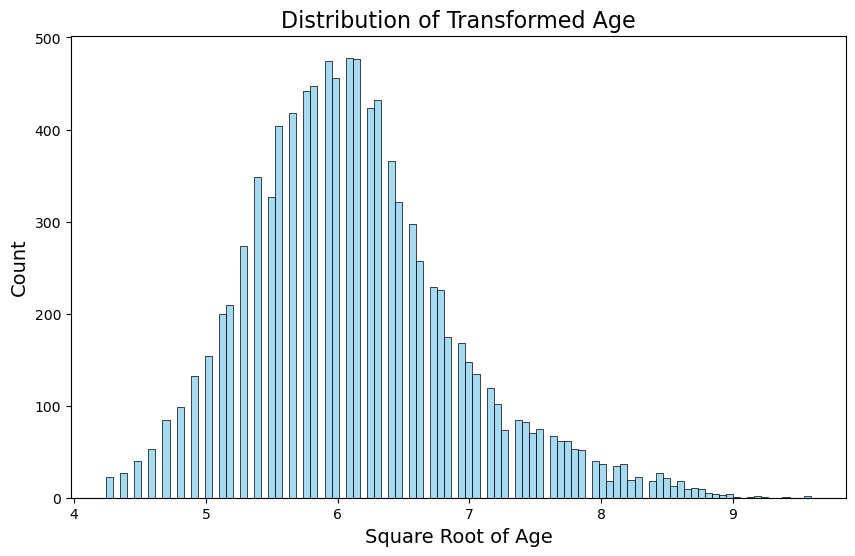

In [82]:
# 나이를 '루트(나이)'로 변환하여 히스토그램 그리기
plt.figure(figsize=(10, 6))
transformed_age = np.sqrt(df['Age'])  # 나이를 '루트(나이)'로 변환

sns.histplot(data=df, x=transformed_age, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Square Root of Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Transformed Age', fontsize=16)
plt.show()

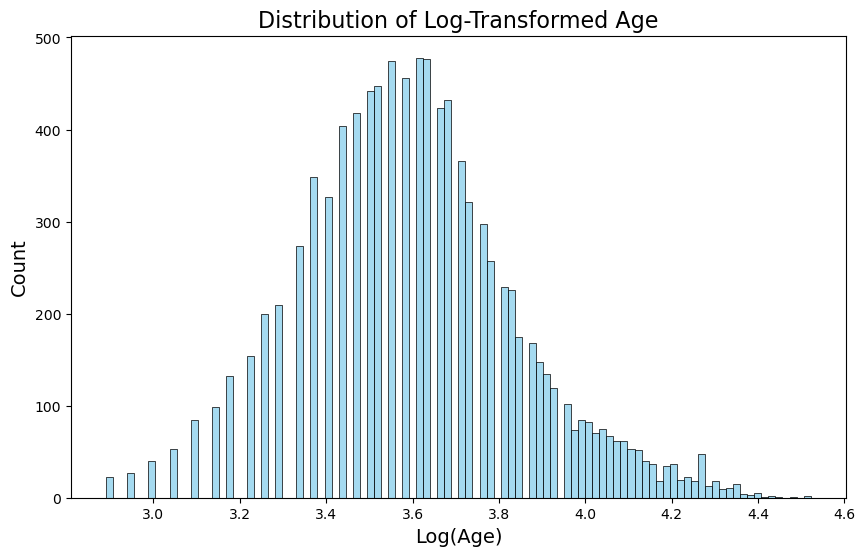

In [83]:
# 나이를 로그 변환하여 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=np.log(df['Age']), bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Log(Age)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Log-Transformed Age', fontsize=16)
plt.show()


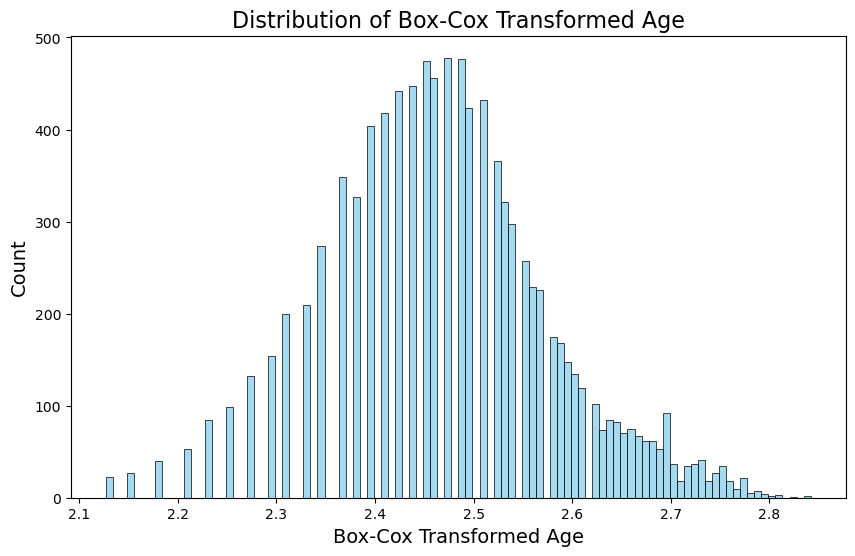

In [84]:
from scipy.stats import boxcox

# Age에 Box-Cox 변환 적용
transformed_age, _ = boxcox(df['Age'])

# 변환된 나이에 대한 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=transformed_age, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Box-Cox Transformed Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Box-Cox Transformed Age', fontsize=16)
plt.show()


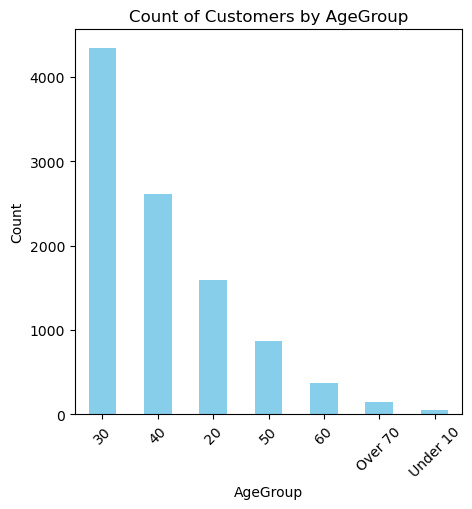

In [113]:
# 연령대를 나누는 함수 정의
def categorize_age(age):
    if age < 20:
        return 'Under 10'
    elif age < 30:
        return '20'
    elif age < 40:
        return '30'
    elif age < 50:
        return '40'
    elif age < 60:
        return '50'
    elif age < 70:
        return '60'
    else:
        return 'Over 70'

# 연령대 카테고리 열 추가
df['Age_Group'] = df['Age'].apply(categorize_age)

# 연령대별 데이터 수 계산
age_group_counts = df['Age_Group'].value_counts()

# 막대 그래프로 시각화
plt.figure(figsize=(5, 5))
age_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('AgeGroup')
plt.ylabel('Count')
plt.title('Count of Customers by AgeGroup')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

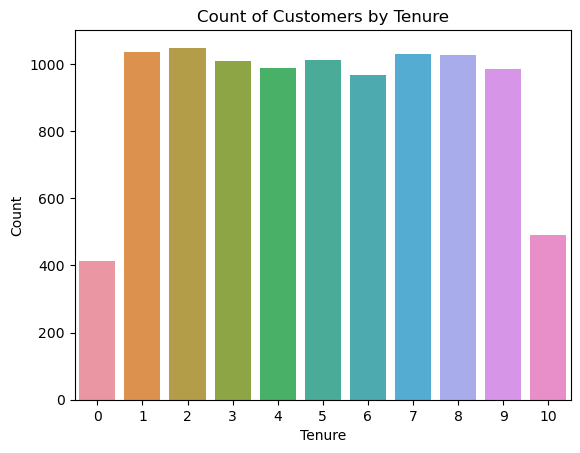

In [62]:
# 'Tenure': 카테고리별 막대 그래프
sns.countplot(x='Tenure', data=df)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Count of Customers by Tenure')
plt.show()

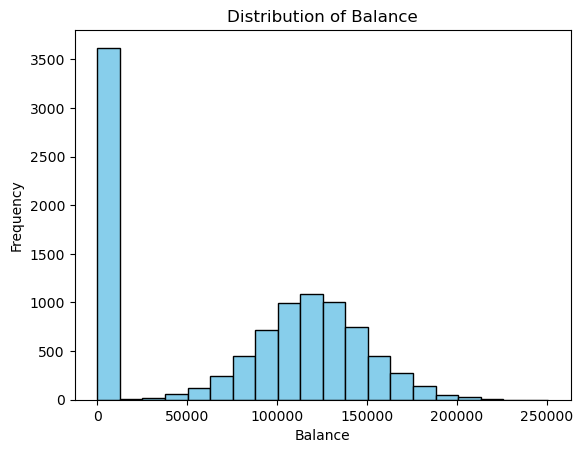

In [124]:
# 'Balance': 히스토그램
plt.hist(df['Balance'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance')
plt.show()

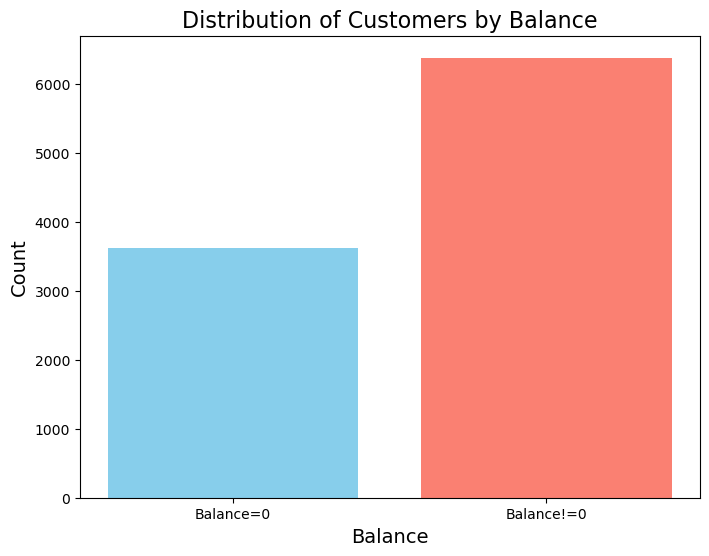

In [74]:
# 'Balance'가 0인 사람과 그렇지 않은 사람의 분포를 막대 그래프로 표현
plt.figure(figsize=(8, 6))

# 'Balance'가 0인 사람의 수
balance_zero_count = (df['Balance'] == 0).sum()

# 'Balance'가 0이 아닌 사람의 수
balance_nonzero_count = df.shape[0] - balance_zero_count

# 막대 그래프 그리기
plt.bar(['Balance=0', 'Balance!=0'], [balance_zero_count, balance_nonzero_count], color=['skyblue', 'salmon'])
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Customers by Balance', fontsize=16)
plt.show()

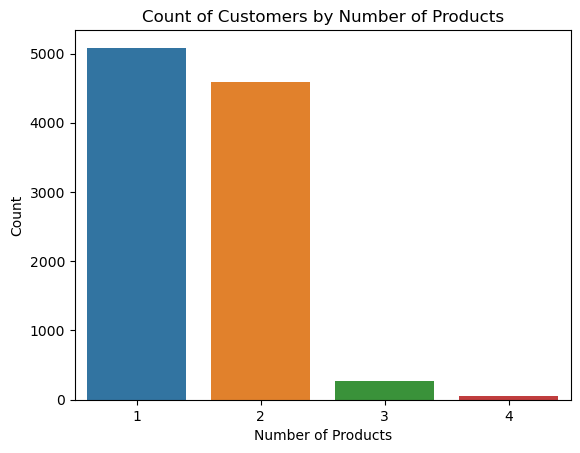

In [64]:
# 'NumOfProducts': 카테고리별 막대 그래프
sns.countplot(x='NumOfProducts', data=df)
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.title('Count of Customers by Number of Products')
plt.show()

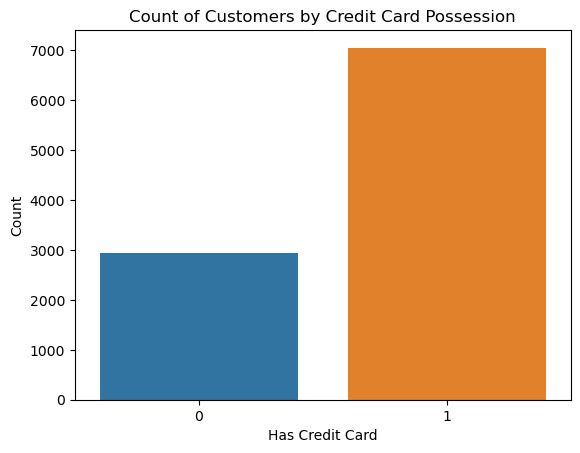

In [65]:
# 'HasCrCard': 카테고리별 막대 그래프
sns.countplot(x='HasCrCard', data=df)
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.title('Count of Customers by Credit Card Possession')
plt.show()

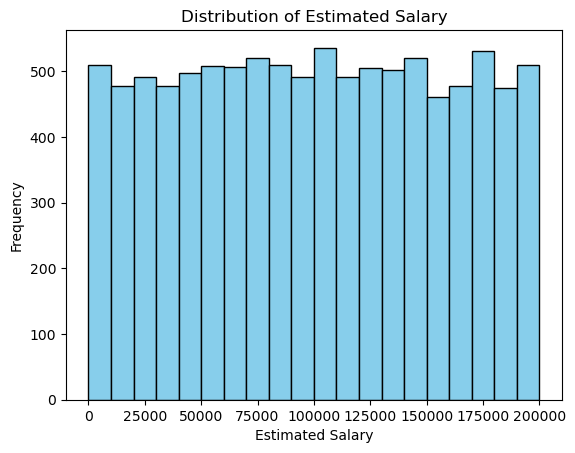

In [66]:
# 'EstimatedSalary': 히스토그램
plt.hist(df['EstimatedSalary'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Salary')
plt.show()

C:\Users\gadi2\AppData\Local\Temp\ipykernel_9396\3942464602.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


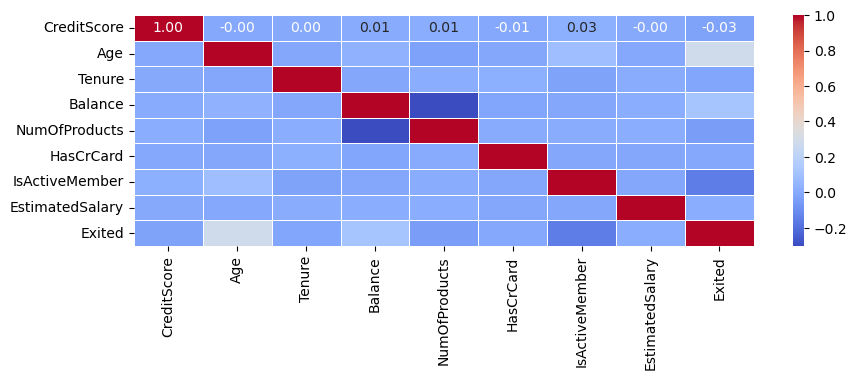

In [143]:
# 히트맵 그리기
plt.figure(figsize=(10, 3))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

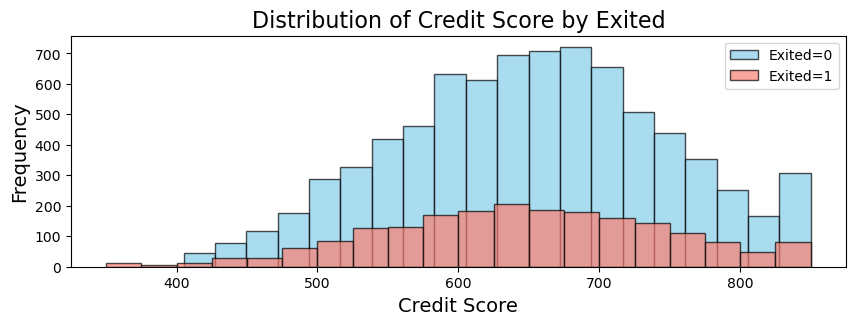

In [90]:
# Exited가 0인 경우의 CreditScore 분포
plt.figure(figsize=(10, 3))
plt.hist(df[df['Exited'] == 0]['CreditScore'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Exited=0')

# Exited가 1인 경우의 CreditScore 분포
plt.hist(df[df['Exited'] == 1]['CreditScore'], bins=20, color='salmon', edgecolor='black', alpha=0.7, label='Exited=1')

plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Credit Score by Exited', fontsize=16)
plt.legend()
plt.show()

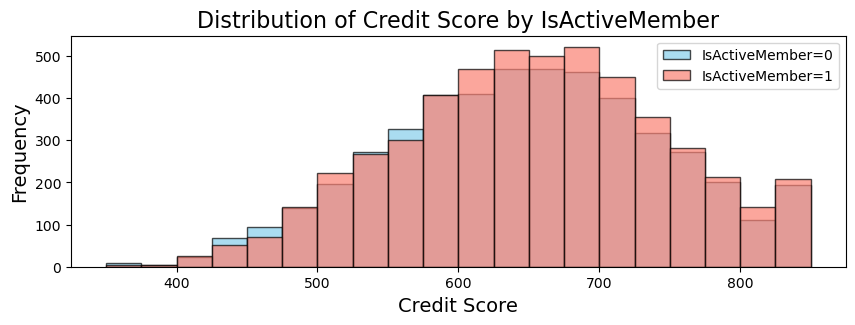

In [91]:
# IsActiveMember가 0인 경우의 CreditScore 분포
plt.figure(figsize=(10, 3))
plt.hist(df[df['IsActiveMember'] == 0]['CreditScore'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='IsActiveMember=0')

# IsActiveMember가 1인 경우의 CreditScore 분포
plt.hist(df[df['IsActiveMember'] == 1]['CreditScore'], bins=20, color='salmon', edgecolor='black', alpha=0.7, label='IsActiveMember=1')

plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Credit Score by IsActiveMember', fontsize=16)
plt.legend()
plt.show()

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

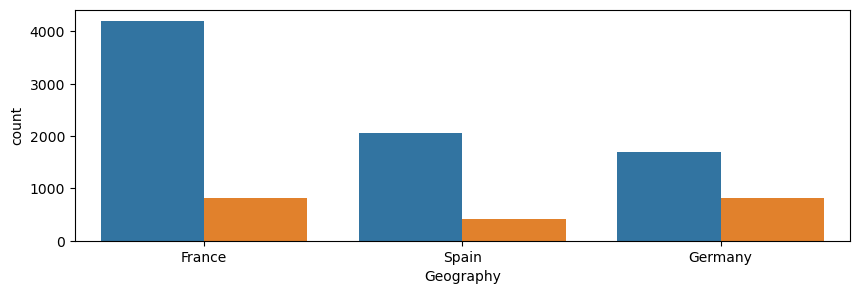

In [92]:
# 'Exited'에 따른 'Geography' 분포를 시각화
plt.figure(figsize=(10, 3))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.xlabel('Geography', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Exited by Geography', fontsize=16)
plt.legend(title='Exited', loc='upper right')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

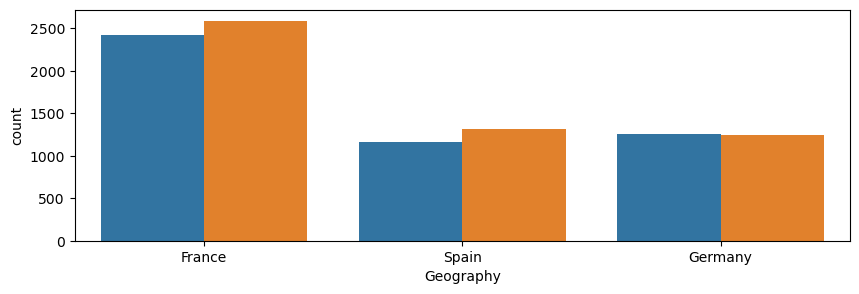

In [93]:
# 'IsActiveMember'에 따른 'Geography' 분포를 시각화
plt.figure(figsize=(10, 3))
sns.countplot(x='Geography', hue='IsActiveMember', data=df)
plt.xlabel('Geography', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of IsActiveMember by Geography', fontsize=16)
plt.legend(title='IsActiveMember', loc='upper right')
plt.show()

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

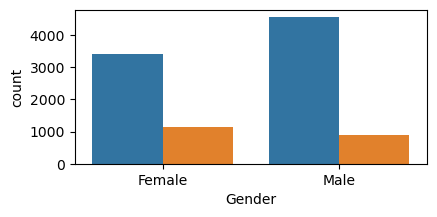

In [95]:
# 'Gender'에 따른 'Exited' 분포를 시각화
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', hue='Exited', data=df)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Exited by Gender', fontsize=16)
plt.legend(title='Exited', loc='upper right')

plt.tight_layout()
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

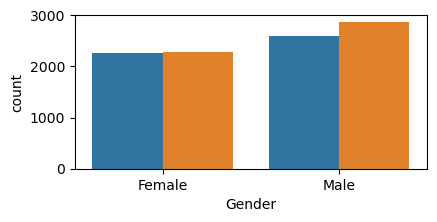

In [96]:
# 'Gender'에 따른 'IsActiveMember' 분포를 시각화
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', hue='IsActiveMember', data=df)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of IsActiveMember by Gender', fontsize=16)
plt.legend(title='IsActiveMember', loc='upper right')

plt.tight_layout()
plt.show()

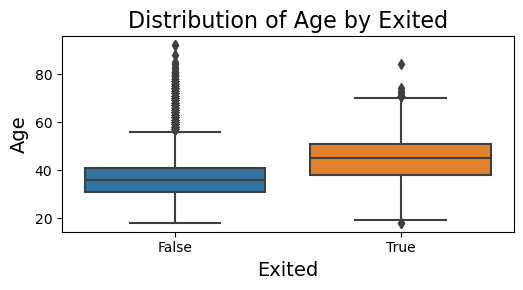

In [97]:
# 'Exited'와 연관하여 시각화
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Age', data=df)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Distribution of Age by Exited', fontsize=16)

plt.tight_layout()
plt.show()

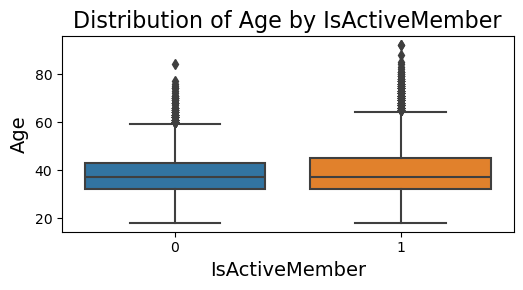

In [98]:
# 'IsActiveMember'와 연관하여 시각화
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x='IsActiveMember', y='Age', data=df)
plt.xlabel('IsActiveMember', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Distribution of Age by IsActiveMember', fontsize=16)

plt.tight_layout()
plt.show()

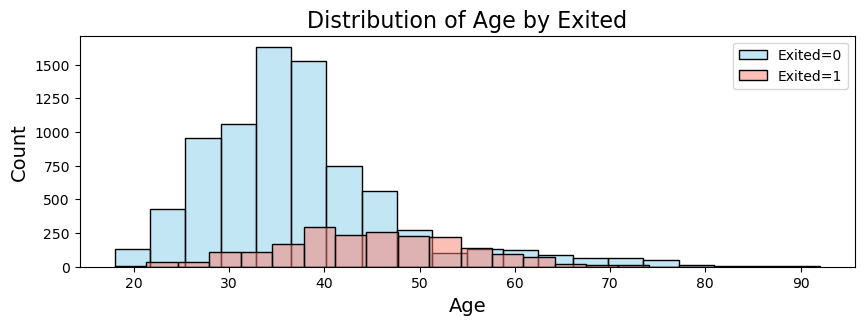

In [108]:
# 'Exited'에 따른 'Age'의 히스토그램
plt.figure(figsize=(10, 3))

# 'Exited'가 0일 때의 'Age' 분포
sns.histplot(data=df[df['Exited'] == 0], x='Age', bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Exited=0')

# 'Exited'가 1일 때의 'Age' 분포
sns.histplot(data=df[df['Exited'] == 1], x='Age', bins=20, color='salmon', edgecolor='black', alpha=0.5, label='Exited=1')

plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Age by Exited', fontsize=16)
plt.legend()
plt.show()

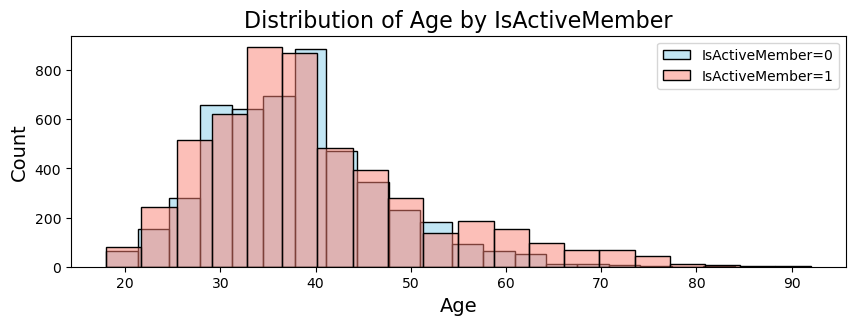

In [109]:
# 'IsActiveMember'에 따른 'Age'의 히스토그램
plt.figure(figsize=(10, 3))

# 'IsActiveMember'가 0일 때의 'Age' 분포
sns.histplot(data=df[df['IsActiveMember'] == 0], x='Age', bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='IsActiveMember=0')

# 'IsActiveMember'가 1일 때의 'Age' 분포
sns.histplot(data=df[df['IsActiveMember'] == 1], x='Age', bins=20, color='salmon', edgecolor='black', alpha=0.5, label='IsActiveMember=1')

plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Age by IsActiveMember', fontsize=16)
plt.legend()
plt.show()

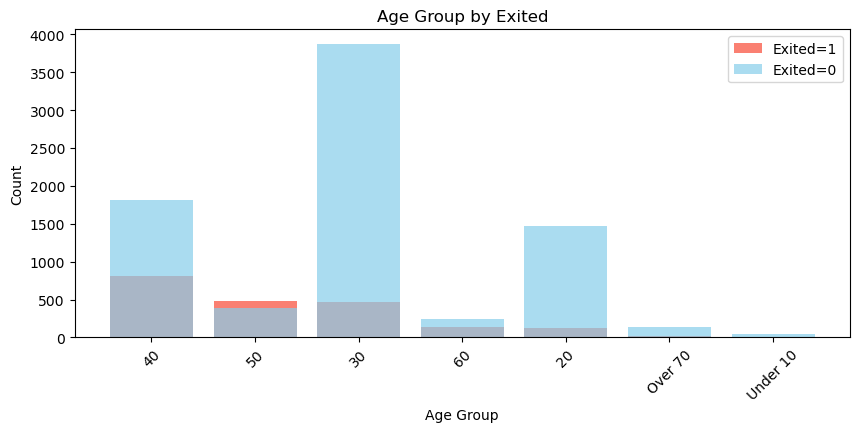

In [116]:
# 'Exited'가 1인 경우의 연령대별 데이터 수 계산
exited_1_age_group_counts = df[df['Exited'] == 1]['Age_Group'].value_counts()

# 'Exited'가 0인 경우의 연령대별 데이터 수 계산
exited_0_age_group_counts = df[df['Exited'] == 0]['Age_Group'].value_counts()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 4))

# 'Exited'가 1인 경우의 막대 그래프
plt.bar(exited_1_age_group_counts.index, exited_1_age_group_counts.values, color='salmon', label='Exited=1')

# 'Exited'가 0인 경우의 막대 그래프
plt.bar(exited_0_age_group_counts.index, exited_0_age_group_counts.values, color='skyblue', label='Exited=0', alpha=0.7)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group by Exited')
plt.legend()
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

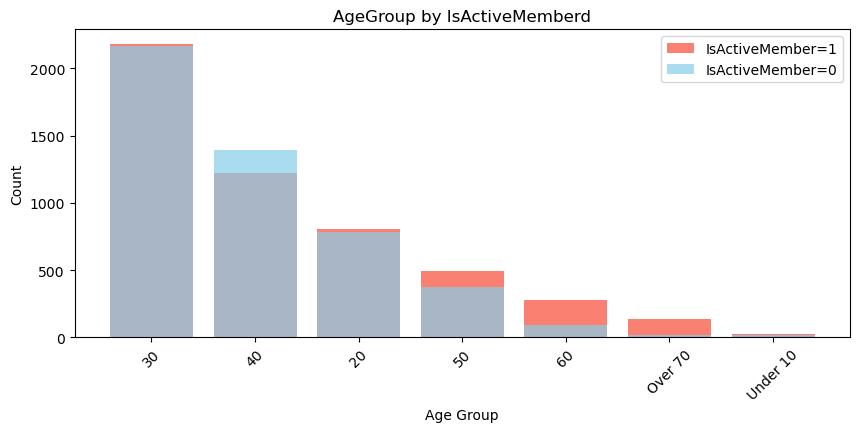

In [117]:
# 'IsActiveMember'가 1인 경우의 연령대별 데이터 수 계산
IsActiveMember_1_age_group_counts = df[df['IsActiveMember'] == 1]['Age_Group'].value_counts()

# 'IsActiveMember'가 0인 경우의 연령대별 데이터 수 계산
IsActiveMember_0_age_group_counts = df[df['IsActiveMember'] == 0]['Age_Group'].value_counts()

# 막대 그래프로 시각화
plt.figure(figsize=(10, 4))

# 'IsActiveMember'가 1인 경우의 막대 그래프
plt.bar(IsActiveMember_1_age_group_counts.index, IsActiveMember_1_age_group_counts.values, color='salmon', label='IsActiveMember=1')

# 'IsActiveMember'가 0인 경우의 막대 그래프
plt.bar(IsActiveMember_0_age_group_counts.index, IsActiveMember_0_age_group_counts.values, color='skyblue', label='IsActiveMember=0', alpha=0.7)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('AgeGroup by IsActiveMemberd')
plt.legend()
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

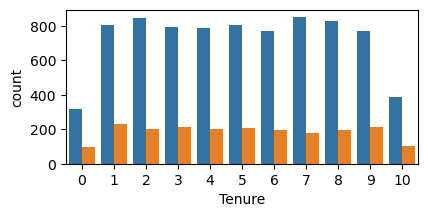

In [119]:
# 'Tenure'에 따른 'Exited' 분포를 시각화
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
sns.countplot(x='Tenure', hue='Exited', data=df)
plt.xlabel('Tenure', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Exited by Tenure', fontsize=16)
plt.legend(title='Exited', loc='upper right')

plt.tight_layout()
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

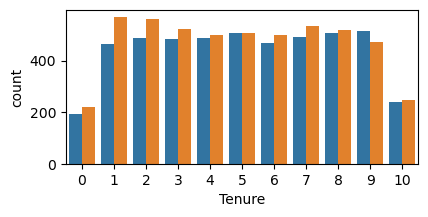

In [121]:
# 'Tenure'에 따른 'IsActiveMember' 분포를 시각화
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
sns.countplot(x='Tenure', hue='IsActiveMember', data=df)
plt.xlabel('Tenure', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of IsActiveMember by Tenure', fontsize=16)
plt.legend(title='IsActiveMember', loc='upper right')

plt.tight_layout()
plt.show()

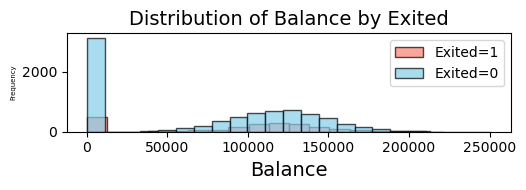

In [130]:
# 'Exited'와 연관하여 시각화
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
plt.hist(df[df['Exited'] == 1]['Balance'], bins=20, color='salmon', edgecolor='black', alpha=0.7, label='Exited=1')
plt.hist(df[df['Exited'] == 0]['Balance'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Exited=0')
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Frequency', fontsize=5)
plt.title('Distribution of Balance by Exited', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

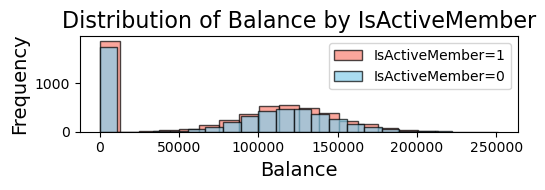

In [129]:
# 'IsActiveMember'와 연관하여 시각화
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
plt.hist(df[df['IsActiveMember'] == 1]['Balance'], bins=20, color='salmon', edgecolor='black', alpha=0.7, label='IsActiveMember=1')
plt.hist(df[df['IsActiveMember'] == 0]['Balance'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='IsActiveMember=0')
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Balance by IsActiveMember', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

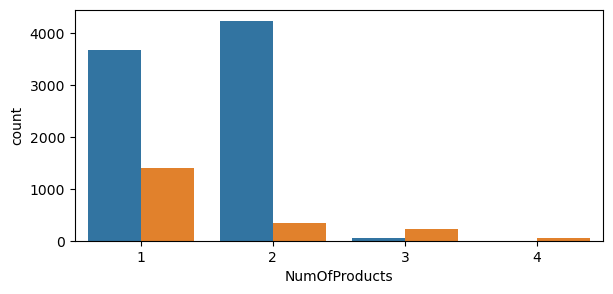

In [134]:
# 'NumOfProducts'에 따른 'Exited' 분포를 시각화
plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Exited by Number of Products', fontsize=16)
plt.legend(title='Exited', loc='upper right')

plt.tight_layout()
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

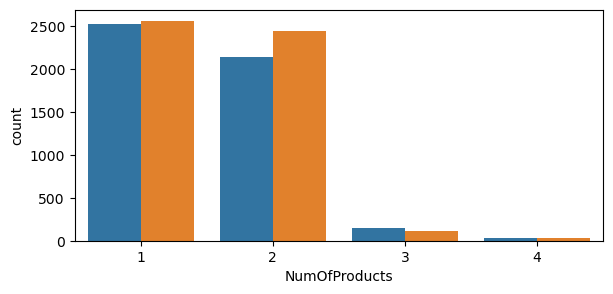

In [135]:
# 'NumOfProducts'에 따른 'IsActiveMember' 분포를 시각화
plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
sns.countplot(x='NumOfProducts', hue='IsActiveMember', data=df)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of IsActiveMember by Number of Products', fontsize=16)
plt.legend(title='IsActiveMember', loc='upper right')

plt.tight_layout()
plt.show()

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

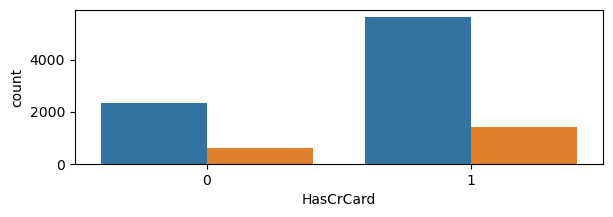

In [137]:
# 'HasCrCard'에 따른 'Exited' 분포를 시각화
plt.figure(figsize=(15, 2))
plt.subplot(1, 2, 1)
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.xlabel('Has Credit Card', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Exited by Credit Card Possession', fontsize=16)
plt.legend(title='Exited', loc='upper right')

plt.tight_layout()
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

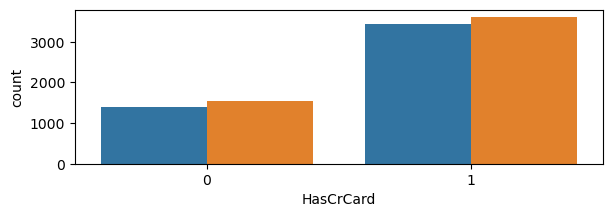

In [138]:
# 'HasCrCard'에 따른 'IsActiveMember' 분포를 시각화
plt.figure(figsize=(15, 2))

plt.subplot(1, 2, 2)
sns.countplot(x='HasCrCard', hue='IsActiveMember', data=df)
plt.xlabel('Has Credit Card', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of IsActiveMember by Credit Card Possession', fontsize=16)
plt.legend(title='IsActiveMember', loc='upper right')

plt.tight_layout()
plt.show()

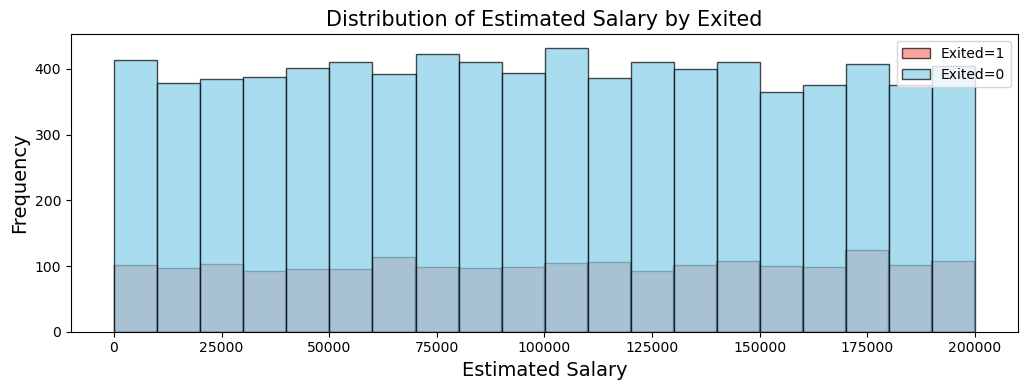

In [ ]:
# 'Exited'와 연관하여 시각화
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.hist(df[df['Exited'] == 1]['EstimatedSalary'], bins=20, color='salmon', edgecolor='black', alpha=0.7, label='Exited=1')
plt.hist(df[df['Exited'] == 0]['EstimatedSalary'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Exited=0')
plt.xlabel('Estimated Salary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Estimated Salary by Exited', fontsize=15)
plt.legend()

plt.tight_layout()
plt.show()

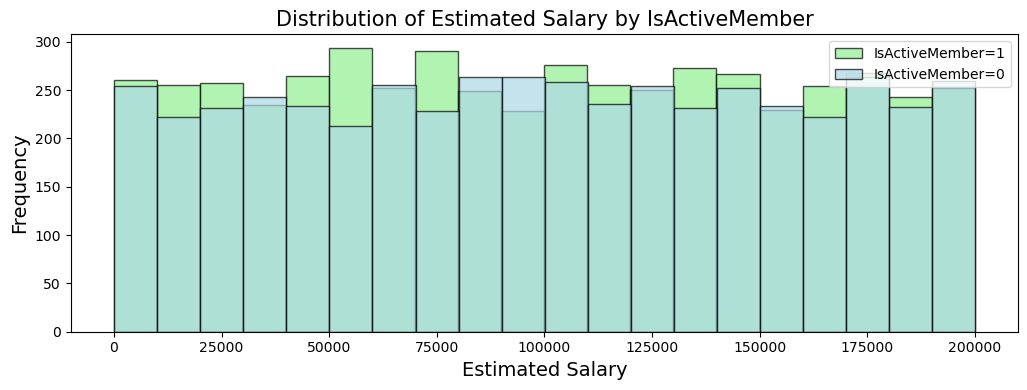

In [ ]:
# 'Exited'와 연관하여 시각화
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 2)
plt.hist(df[df['IsActiveMember'] == 1]['EstimatedSalary'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7, label='IsActiveMember=1')
plt.hist(df[df['IsActiveMember'] == 0]['EstimatedSalary'], bins=20, color='lightblue', edgecolor='black', alpha=0.7, label='IsActiveMember=0')
plt.xlabel('Estimated Salary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Estimated Salary by IsActiveMember', fontsize=15)
plt.legend()

plt.tight_layout()
plt.show()

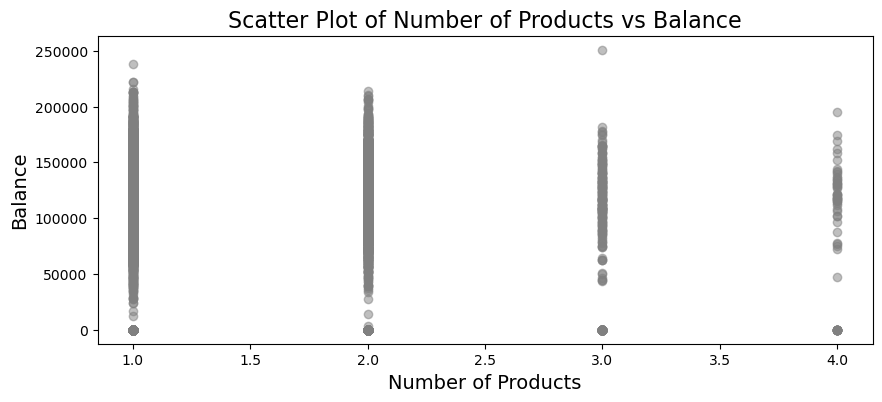

In [145]:
# NumOfProducts와 Balance에 대한 산점도
plt.figure(figsize=(10, 4))
plt.scatter(df['NumOfProducts'], df['Balance'], color='gray', alpha=0.5)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Balance', fontsize=14)
plt.title('Scatter Plot of Number of Products vs Balance', fontsize=16)
plt.show()

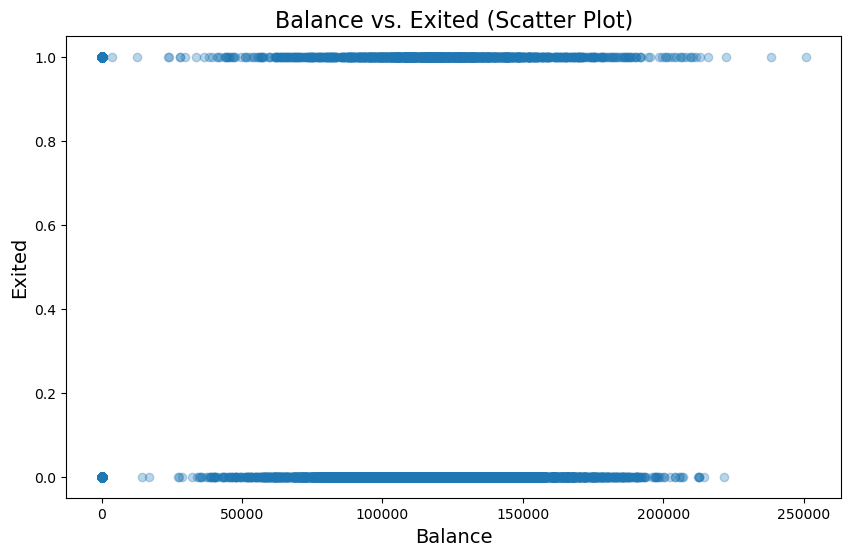

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Balance'], df['Exited'], alpha=0.3)
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Exited', fontsize=14)
plt.title('Balance vs. Exited (Scatter Plot)', fontsize=16)
plt.show()

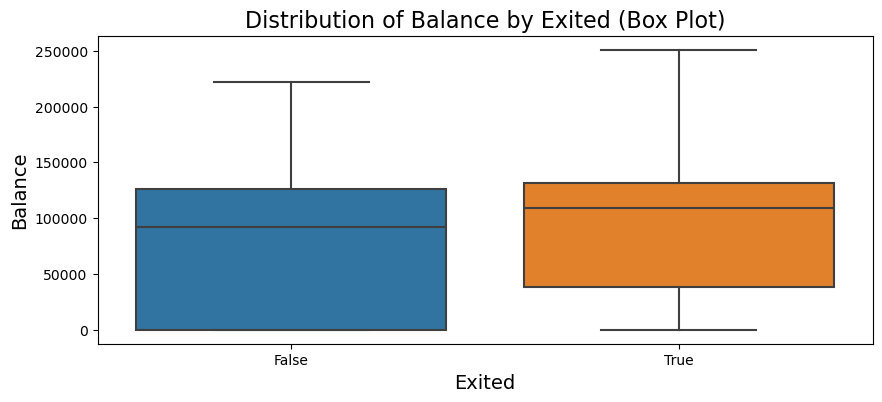

In [146]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('Balance', fontsize=14)
plt.title('Distribution of Balance by Exited (Box Plot)', fontsize=16)
plt.show()

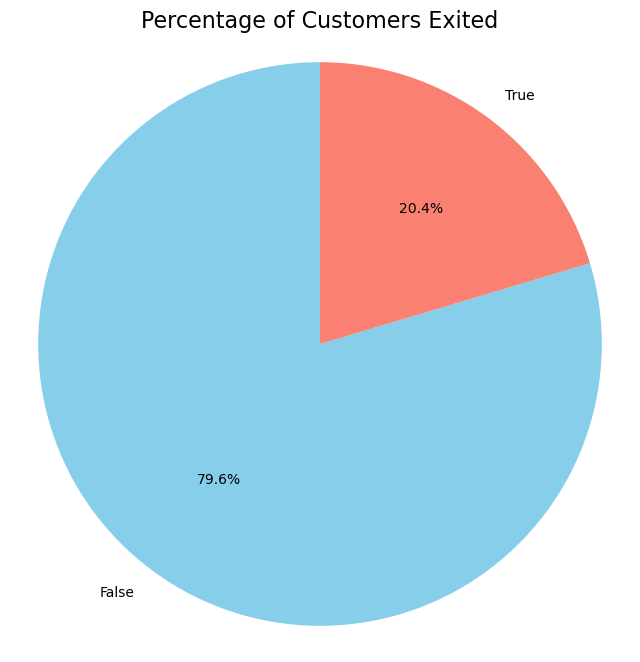

In [89]:
# 'Exited' 변수 값에 따른 이탈 비율 계산
exit_counts = df['Exited'].value_counts()
exit_percentages = exit_counts / df.shape[0] * 100  # 이탈 비율 계산

# 원 그래프로 전체 고객 대비 이탈 비율 시각화
plt.figure(figsize=(8, 8))
plt.pie(exit_percentages, labels=exit_percentages.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Percentage of Customers Exited', fontsize=16)
plt.axis('equal')  # 원 그래프를 원형으로 출력
plt.show()